In [1]:
import pandas as pd
from urllib.parse import urlparse
import copy
import numpy as np
import tldextract

### Input Files for Preprocessing

* The scraped links are pre-processed using the following script. It assumes that the Fake websites Level 1 and Level 2 hyperlinks scraped are in fake_level1.csv and fake_level2.csv respectively. Following is the sample format of the input file

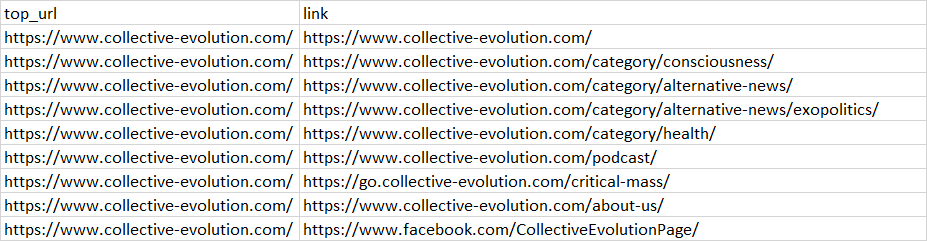

* Here top_url is the base domain link and link column contains all the hyperlinks found on the base domain link. The process is repeated for Real websites

### Normalize the URLs to Domains

* The following cell combines all the edges from Level 1 into domain -> domain reprentation csv file. We normalize all the URLs to their respective domains and then remove duplicates.

In [2]:
############ For Fake Websites Level 1 - 03062021 RUN

import pandas as pd
from urllib.parse import urlparse
import tldextract
import copy
import validators

def formaturl(url):
    info = tldextract.extract(url)
    return (str(info.domain+'.'+info.suffix))

try:
    df = pd.read_csv('./URLData/03062021/fake_level1.csv', error_bad_lines=False, names=["top_url","link"])
except Exception as e:
    print(e)
df_formatted = copy.deepcopy(df[['top_url', 'link']])
df_formatted['top_url'] = df_formatted['top_url'].apply(lambda x: formaturl(str(x)))
df_formatted['link'] = df_formatted['link'].apply(lambda x: formaturl(str(x)))
df_formatted['weight'] = 1
df_formatted['label'] = 'Hyperlink'
df_formatted['validated'] = df_formatted['link'].apply(lambda x: validators.domain(str(x)))
df_formatted['validated_src'] = df_formatted['top_url'].apply(lambda x: validators.domain(str(x)))
df_formatted = df_formatted[df_formatted['validated'] == True]
df_formatted = df_formatted[df_formatted['validated_src'] == True]
df_formatted = df_formatted[['top_url','link','weight','label']]
df_formatted.columns = ['source','target','weight','label']
df_formatted = df_formatted.drop_duplicates()
df_formatted.head(10)
#df_formatted.to_csv(r'./URLData/03062021/fake_level1_analysis.csv', index = False, header=True)

,source,target,weight,label
1,collective-evolution.com,collective-evolution.com,1,Hyperlink
9,collective-evolution.com,facebook.com,1,Hyperlink
10,collective-evolution.com,twitter.com,1,Hyperlink
11,collective-evolution.com,instagram.com,1,Hyperlink
12,collective-evolution.com,youtube.com,1,Hyperlink
76,newspunch.com,newspunch.com,1,Hyperlink
195,newspunch.com,revcontent.com,1,Hyperlink
260,newspunch.com,facebook.com,1,Hyperlink
261,newspunch.com,twitter.com,1,Hyperlink
262,newspunch.com,google.com,1,Hyperlink


### Normalize the URLs to Domains

* The following cell combines all the edges from Level 1 and Level 2 scraping into domain -> domain reprentation csv file. We normalize all the URLs to their respective domains and then remove duplicates.

In [3]:
############ For Fake Websites Level 2

import pandas as pd
from urllib.parse import urlparse
import tldextract
import copy
import validators

def formaturl(url):
    info = tldextract.extract(url)
    return (str(info.domain+'.'+info.suffix))

try:
    df = pd.read_csv('./URLData/03062021/fake_level1.csv', error_bad_lines=False, names=["top_url","link"])
    df2 = pd.read_csv('./URLData/03062021/fake_level2.csv', error_bad_lines=False, names=["top_url","link"])
    df = df.append(df2)
except Exception as e:
    print(e)
df_formatted = copy.deepcopy(df[['top_url', 'link']])
df_formatted['top_url'] = df_formatted['top_url'].apply(lambda x: formaturl(str(x)))
df_formatted['link'] = df_formatted['link'].apply(lambda x: formaturl(str(x)))
df_formatted['weight'] = 1
df_formatted['label'] = 'Hyperlink'
df_formatted['validated'] = df_formatted['link'].apply(lambda x: validators.domain(str(x)))
df_formatted['validated_src'] = df_formatted['top_url'].apply(lambda x: validators.domain(str(x)))
df_formatted = df_formatted[df_formatted['validated'] == True]
df_formatted = df_formatted[df_formatted['validated_src'] == True]
df_formatted = df_formatted[['top_url','link','weight','label']]
df_formatted.columns = ['source','target','weight','label']
df_formatted = df_formatted.drop_duplicates()
df_formatted.head(10)
#df_formatted.to_csv(r'./URLData/03062021/fake_level2_analysis.csv', index = False, header=True)

,source,target,weight,label
1,collective-evolution.com,collective-evolution.com,1,Hyperlink
9,collective-evolution.com,facebook.com,1,Hyperlink
10,collective-evolution.com,twitter.com,1,Hyperlink
11,collective-evolution.com,instagram.com,1,Hyperlink
12,collective-evolution.com,youtube.com,1,Hyperlink
76,newspunch.com,newspunch.com,1,Hyperlink
195,newspunch.com,revcontent.com,1,Hyperlink
260,newspunch.com,facebook.com,1,Hyperlink
261,newspunch.com,twitter.com,1,Hyperlink
262,newspunch.com,google.com,1,Hyperlink


### Repeat the Process for Real Domains

* Repeat the process for the scraped real domains and save all the csv files which are later fed into the following script.

### Combine Level 1 for analysis

* Take the file generated from previous cells to create a Pivot table (refer to table in the paper)
* Here original_1000_fake.csv and original_1000_real.csv are the datasets created for the project found in the root directory of the repository.

In [ ]:
##### TOP 500 Level 1 Analysis Combined

import numpy as np
from cdlib import algorithms
import itertools
df_fake = pd.read_csv('./URLData/03062021/fake_level1_analysis.csv')
df_original = pd.read_csv('original_1000_fake.csv')
df_fake['source'] = df_fake['source'].str.lower()
df_original['source'] = df_original['source'].str.lower()
fake_domains = df_original['source'].to_list()
df_real = pd.read_csv('./URLData/03062021/real_level1_analysis.csv')
df_real_original = pd.read_csv('original_1000_real.csv')
df_real['source'] = df_real['source'].str.lower()
df_real_original['source'] = df_real_original['source'].str.lower()
real_domains = df_real_original['source'].to_list()
df_combined = df_fake.append(df_real)
df_combined['sourceREAL'] = np.where(df_combined['source'].isin(real_domains), 'Real', 'None')
df_combined['sourceFAKE'] = np.where(df_combined['source'].isin(fake_domains), 'Fake', 'None')
df_combined['targetREAL'] = np.where(df_combined['target'].isin(real_domains), 'Real', 'None')
df_combined['targetFAKE'] = np.where(df_combined['target'].isin(fake_domains), 'Fake', 'None')
#df_combined.to_csv(r'./URLData/03062021/combined_level1_analysis.csv', index = False, header=True)

### Generate Pivot table (similar to paper)

In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('./URLData/03062021/combined_level1_analysis.csv')
table = pd.pivot_table(df, values='weight', index=['sourceREAL'], columns=['targetREAL'], aggfunc=np.sum)
table

targetREAL,Fake,None,Real
sourceREAL,,,
Fake,1409,6131,341
Real,61,7980,1305


In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv('./URLData/03062021/combined_level1_analysis.csv')
table = pd.pivot_table(df, values='weight', index=['sourceREAL','customLabel'], columns=['targetREAL'], aggfunc=np.sum)
table

targetREAL                Fake    None   Real
sourceREAL customLabel                       
Real       business        1.0  1157.0  202.0
           education       4.0  1209.0  250.0
           entertainment  24.0   878.0  196.0
           health          NaN   215.0   47.0
           newsandmedia   27.0  2248.0  308.0
           religion        1.0   106.0   14.0
           sports          4.0  2167.0  288.0